In [36]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
dictionary = json.load(open('/Users/prana/Downloads/3264e47f047a037b-Acc20230227145008.json'))
data = pd.DataFrame(dictionary)
dictionary1 = json.load(open('/Users/prana/Downloads/3264e47f047a037b-PPG20230227145008.json'))
data1 = pd.DataFrame(dictionary1)
df = pd.read_csv ('D:\Pilot Study\Yash Data\Data\Lab_Yash_Session1_P1_201F_Calibrated_SD.csv',skiprows=1,sep='\t',header=None)#,usecols=['Time', 'PPG', 'A_X','A_Y','A_Z']
display(df)
display(data)
display(data1)
%matplotlib notebook

,0,1,2,3,4,5
0,P1_201F_Timestamp_Unix_CAL,P1_201F_Accel_LN_X_CAL,P1_201F_Accel_LN_Y_CAL,P1_201F_Accel_LN_Z_CAL,P1_201F_PPG_A13_CAL,NaN
1,ms,m/(s^2),m/(s^2),m/(s^2),mV,NaN
2,1.6774884532764282E12,-2.3152173913043477,1.5326086956521738,6.630434782608695,1136.2637362637363,NaN
3,1.6774884533164062E12,-3.369565217391304,4.1521739130434785,8.847826086956522,1141.3919413919414,NaN
4,1.6774884533563843E12,-3.793478260869565,4.4021739130434785,9.597826086956522,1252.7472527472526,NaN
...,...,...,...,...,...,...
28839,1.6774896061228027E12,10.58695652173913,3.782608695652174,3.6739130434782608,1400.0,NaN
28840,1.6774896061627808E12,10.478260869565217,4.413043478260869,3.7391304347826084,1386.8131868131868,NaN
28841,1.6774896062027588E12,10.293478260869565,4.641304347826087,3.7065217391304346,1383.150183150183,NaN
28842,1.6774896062427368E12,10.25,4.489130434782608,3.9565217391304346,1386.080586080586,NaN


,Time,A_X,A_Y,A_Z
0,1677488527503,-1306,1025,3676
1,1677488527543,-1268,1031,3730
2,1677488527582,-1308,1026,3676
3,1677488527624,-1293,1028,3727
4,1677488527663,-1288,1039,3688
...,...,...,...,...
26695,1677489599844,-4073,-229,529
26696,1677489599885,-3904,-523,453
26697,1677489599925,-3873,-807,442
26698,1677489599964,-3812,-1030,684


,Time,PPG
0,1677488527503,2097152
1,1677488527543,2146043
2,1677488527582,2146047
3,1677488527624,2146060
4,1677488527663,2146092
...,...,...
26695,1677489599844,2089816
26696,1677489599885,2089686
26697,1677489599925,2089549
26698,1677489599964,2089435


In [37]:
new_column_names = ['STime','SA_X','SA_Y','SA_Z','SPPG','A']
df.columns = new_column_names

In [38]:
df = df.drop(index=[0, 1]).reset_index(drop=True)
df = df.drop(columns=["A"])

df

,STime,SA_X,SA_Y,SA_Z,SPPG
0,1.6774884532764282E12,-2.3152173913043477,1.5326086956521738,6.630434782608695,1136.2637362637363
1,1.6774884533164062E12,-3.369565217391304,4.1521739130434785,8.847826086956522,1141.3919413919414
2,1.6774884533563843E12,-3.793478260869565,4.4021739130434785,9.597826086956522,1252.7472527472526
3,1.6774884533963623E12,-5.195652173913043,6.510869565217391,6.934782608695652,1322.3443223443223
4,1.6774884534363403E12,-6.369565217391304,4.684782608695652,6.934782608695652,1332.6007326007325
...,...,...,...,...,...
28837,1.6774896061228027E12,10.58695652173913,3.782608695652174,3.6739130434782608,1400.0
28838,1.6774896061627808E12,10.478260869565217,4.413043478260869,3.7391304347826084,1386.8131868131868
28839,1.6774896062027588E12,10.293478260869565,4.641304347826087,3.7065217391304346,1383.150183150183
28840,1.6774896062427368E12,10.25,4.489130434782608,3.9565217391304346,1386.080586080586


In [39]:
import datetime

df['STime'] = pd.to_datetime(df['STime'], unit='ms', utc=False)
df['STime']=df['STime'].dt.tz_localize('UTC').dt.tz_convert('Asia/Kolkata')
df['STime'] = df['STime'].apply(lambda x: x.strftime("%Y-%m-%d %H:%M:%S.%f"))
df

,STime,SA_X,SA_Y,SA_Z,SPPG
0,2023-02-27 14:30:53.276428,-2.3152173913043477,1.5326086956521738,6.630434782608695,1136.2637362637363
1,2023-02-27 14:30:53.316406,-3.369565217391304,4.1521739130434785,8.847826086956522,1141.3919413919414
2,2023-02-27 14:30:53.356384,-3.793478260869565,4.4021739130434785,9.597826086956522,1252.7472527472526
3,2023-02-27 14:30:53.396362,-5.195652173913043,6.510869565217391,6.934782608695652,1322.3443223443223
4,2023-02-27 14:30:53.436340,-6.369565217391304,4.684782608695652,6.934782608695652,1332.6007326007325
...,...,...,...,...,...
28837,2023-02-27 14:50:06.122802,10.58695652173913,3.782608695652174,3.6739130434782608,1400.0
28838,2023-02-27 14:50:06.162780,10.478260869565217,4.413043478260869,3.7391304347826084,1386.8131868131868
28839,2023-02-27 14:50:06.202758,10.293478260869565,4.641304347826087,3.7065217391304346,1383.150183150183
28840,2023-02-27 14:50:06.242736,10.25,4.489130434782608,3.9565217391304346,1386.080586080586


In [40]:
df.columns

Index(['STime', 'SA_X', 'SA_Y', 'SA_Z', 'SPPG'], dtype='object')

In [41]:
df=df.iloc[1850:28858].reset_index(drop=True)
df

,STime,SA_X,SA_Y,SA_Z,SPPG
0,2023-02-27 14:32:07.235778,9.880434782608695,1.1630434782608696,6.0978260869565215,1515.7509157509157
1,2023-02-27 14:32:07.275756,9.869565217391305,1.1521739130434783,6.0978260869565215,1443.956043956044
2,2023-02-27 14:32:07.315734,9.728260869565217,1.1630434782608696,6.217391304347826,1370.6959706959706
3,2023-02-27 14:32:07.355712,9.826086956521738,1.1739130434782608,6.130434782608695,1344.3223443223442
4,2023-02-27 14:32:07.395690,9.815217391304348,1.2065217391304348,6.1521739130434785,1347.2527472527472
...,...,...,...,...,...
26987,2023-02-27 14:50:06.122802,10.58695652173913,3.782608695652174,3.6739130434782608,1400.0
26988,2023-02-27 14:50:06.162780,10.478260869565217,4.413043478260869,3.7391304347826084,1386.8131868131868
26989,2023-02-27 14:50:06.202758,10.293478260869565,4.641304347826087,3.7065217391304346,1383.150183150183
26990,2023-02-27 14:50:06.242736,10.25,4.489130434782608,3.9565217391304346,1386.080586080586


In [42]:
data['A_X'] = data['A_X'].apply(lambda x:float(x))
data['A_Y'] = data['A_Y'].apply(lambda x:float(x))
data['A_Z'] = data['A_Z'].apply(lambda x:float(x))
data['Time'] = data['Time'].apply(lambda x:float(x))
data1['PPG'] = data1['PPG'].apply(lambda x:float(x))
data1['Time'] = data1['Time'].apply(lambda x:float(x))

In [43]:

# Set the 'Activity' column to 'Ideal' for the first 500 rows
data.loc[:4499, 'Activity'] = 'Ideal'

# Set the 'Activity' column to 'Sitting' for the next 1000 rows
data.loc[4500:11999, 'Activity'] = 'Sitting'

# Set the 'Activity' column to 'Standing' for the next 1000 rows
data.loc[12000:19499, 'Activity'] = 'Standing'

# Set the 'Activity' column to 'Walking' for the next 1000 rows
data.loc[19500:, 'Activity'] = 'Walking'

# Print the first 10 rows of the data frame
display(data)

,Time,A_X,A_Y,A_Z,Activity
0,1.677489e+12,-1306.0,1025.0,3676.0,Ideal
1,1.677489e+12,-1268.0,1031.0,3730.0,Ideal
2,1.677489e+12,-1308.0,1026.0,3676.0,Ideal
3,1.677489e+12,-1293.0,1028.0,3727.0,Ideal
4,1.677489e+12,-1288.0,1039.0,3688.0,Ideal
...,...,...,...,...,...
26695,1.677490e+12,-4073.0,-229.0,529.0,Walking
26696,1.677490e+12,-3904.0,-523.0,453.0,Walking
26697,1.677490e+12,-3873.0,-807.0,442.0,Walking
26698,1.677490e+12,-3812.0,-1030.0,684.0,Walking


In [44]:
# Set the 'Activity' column to 'Ideal' for the first 500 rows
data1.loc[:4499, 'Activity'] = 'Ideal'

# Set the 'Activity' column to 'Sitting' for the next 1000 rows
data1.loc[4500:11999, 'Activity'] = 'Sitting'

# Set the 'Activity' column to 'Standing' for the next 1000 rows
data1.loc[12000:19499, 'Activity'] = 'Standing'

# Set the 'Activity' column to 'Walking' for the next 1000 rows
data1.loc[19500:, 'Activity'] = 'Walking'

# Print the first 10 rows of the data frame
display(data1)

,Time,PPG,Activity
0,1.677489e+12,2097152.0,Ideal
1,1.677489e+12,2146043.0,Ideal
2,1.677489e+12,2146047.0,Ideal
3,1.677489e+12,2146060.0,Ideal
4,1.677489e+12,2146092.0,Ideal
...,...,...,...
26695,1.677490e+12,2089816.0,Walking
26696,1.677490e+12,2089686.0,Walking
26697,1.677490e+12,2089549.0,Walking
26698,1.677490e+12,2089435.0,Walking


In [45]:
# Set the 'Activity' column to 'Ideal' for the first 500 rows
df.loc[:4499, 'Activity'] = 'Ideal'

# Set the 'Activity' column to 'Sitting' for the next 1000 rows
df.loc[4500:11999, 'Activity'] = 'Sitting'

# Set the 'Activity' column to 'Standing' for the next 1000 rows
df.loc[12000:19499, 'Activity'] = 'Standing'

# Set the 'Activity' column to 'Walking' for the next 1000 rows
df.loc[19500:, 'Activity'] = 'Walking'

# Print the first 10 rows of the data frame
display(df)

,STime,SA_X,SA_Y,SA_Z,SPPG,Activity
0,2023-02-27 14:32:07.235778,9.880434782608695,1.1630434782608696,6.0978260869565215,1515.7509157509157,Ideal
1,2023-02-27 14:32:07.275756,9.869565217391305,1.1521739130434783,6.0978260869565215,1443.956043956044,Ideal
2,2023-02-27 14:32:07.315734,9.728260869565217,1.1630434782608696,6.217391304347826,1370.6959706959706,Ideal
3,2023-02-27 14:32:07.355712,9.826086956521738,1.1739130434782608,6.130434782608695,1344.3223443223442,Ideal
4,2023-02-27 14:32:07.395690,9.815217391304348,1.2065217391304348,6.1521739130434785,1347.2527472527472,Ideal
...,...,...,...,...,...,...
26987,2023-02-27 14:50:06.122802,10.58695652173913,3.782608695652174,3.6739130434782608,1400.0,Walking
26988,2023-02-27 14:50:06.162780,10.478260869565217,4.413043478260869,3.7391304347826084,1386.8131868131868,Walking
26989,2023-02-27 14:50:06.202758,10.293478260869565,4.641304347826087,3.7065217391304346,1383.150183150183,Walking
26990,2023-02-27 14:50:06.242736,10.25,4.489130434782608,3.9565217391304346,1386.080586080586,Walking


In [46]:
dfm = pd.merge(data, data1, on=['Time', 'Activity'])[['Time', 'A_X', 'A_Y', 'A_Z','PPG','Activity']]

dfm

,Time,A_X,A_Y,A_Z,PPG,Activity
0,1.677489e+12,-1306.0,1025.0,3676.0,2097152.0,Ideal
1,1.677489e+12,-1268.0,1031.0,3730.0,2146043.0,Ideal
2,1.677489e+12,-1308.0,1026.0,3676.0,2146047.0,Ideal
3,1.677489e+12,-1293.0,1028.0,3727.0,2146060.0,Ideal
4,1.677489e+12,-1288.0,1039.0,3688.0,2146092.0,Ideal
...,...,...,...,...,...,...
26695,1.677490e+12,-4073.0,-229.0,529.0,2089816.0,Walking
26696,1.677490e+12,-3904.0,-523.0,453.0,2089686.0,Walking
26697,1.677490e+12,-3873.0,-807.0,442.0,2089549.0,Walking
26698,1.677490e+12,-3812.0,-1030.0,684.0,2089435.0,Walking


In [47]:
import datetime

dfm['Time'] = pd.to_datetime(dfm['Time'], unit='ms', utc=False)
dfm['Time']=dfm['Time'].dt.tz_localize('UTC').dt.tz_convert('Asia/Kolkata')
dfm['Time'] = dfm['Time'].apply(lambda x: x.strftime("%Y-%m-%d %H:%M:%S.%f"))
dfm

,Time,A_X,A_Y,A_Z,PPG,Activity
0,2023-02-27 14:32:07.503000,-1306.0,1025.0,3676.0,2097152.0,Ideal
1,2023-02-27 14:32:07.543000,-1268.0,1031.0,3730.0,2146043.0,Ideal
2,2023-02-27 14:32:07.582000,-1308.0,1026.0,3676.0,2146047.0,Ideal
3,2023-02-27 14:32:07.624000,-1293.0,1028.0,3727.0,2146060.0,Ideal
4,2023-02-27 14:32:07.663000,-1288.0,1039.0,3688.0,2146092.0,Ideal
...,...,...,...,...,...,...
26695,2023-02-27 14:49:59.844000,-4073.0,-229.0,529.0,2089816.0,Walking
26696,2023-02-27 14:49:59.884999,-3904.0,-523.0,453.0,2089686.0,Walking
26697,2023-02-27 14:49:59.924999,-3873.0,-807.0,442.0,2089549.0,Walking
26698,2023-02-27 14:49:59.964000,-3812.0,-1030.0,684.0,2089435.0,Walking


In [48]:
import heartpy as hp
sample_rate = hp.get_samplerate_datetime(df['STime'], timeformat = '%Y-%m-%d %H:%M:%S.%f')

print('sampling rate is: %.3f Hz' %sample_rate)

sampling rate is: 25.015 Hz


In [49]:
import heartpy as hp
sample_rate1 = hp.get_samplerate_datetime(dfm['Time'], timeformat = '%Y-%m-%d %H:%M:%S.%f')

print('sampling rate is: %.3f Hz' %sample_rate1)

sampling rate is: 24.895 Hz


In [50]:
import datetime

sampling_rate = sample_rate  # Hz

# Convert timestamp column to datetime dtype
df['STime'] = pd.to_datetime(df['STime'], format='%Y-%m-%d %H:%M:%S.%f')

# Define the sampling rate in milliseconds
sampling_rate_ms = 25

# Loop through each second in the DataFrame
for timestamp, group in df.groupby(pd.Grouper(key='STime', freq='1s')):
    # Remove the milliseconds from the timestamp
    timestamp = timestamp.replace(microsecond=0)
    
    # Count the number of data points in the second
    data_count = len(group)
    
    # Add the sampling rate to the timestamp for each data point
    for i in range(data_count):
        new_timestamp = timestamp + datetime.timedelta(milliseconds=i * sampling_rate_ms)
        df.loc[group.index[i], 'STime'] = new_timestamp

display(df)

,STime,SA_X,SA_Y,SA_Z,SPPG,Activity
0,2023-02-27 14:32:07.000,9.880434782608695,1.1630434782608696,6.0978260869565215,1515.7509157509157,Ideal
1,2023-02-27 14:32:07.025,9.869565217391305,1.1521739130434783,6.0978260869565215,1443.956043956044,Ideal
2,2023-02-27 14:32:07.050,9.728260869565217,1.1630434782608696,6.217391304347826,1370.6959706959706,Ideal
3,2023-02-27 14:32:07.075,9.826086956521738,1.1739130434782608,6.130434782608695,1344.3223443223442,Ideal
4,2023-02-27 14:32:07.100,9.815217391304348,1.2065217391304348,6.1521739130434785,1347.2527472527472,Ideal
...,...,...,...,...,...,...
26987,2023-02-27 14:50:06.075,10.58695652173913,3.782608695652174,3.6739130434782608,1400.0,Walking
26988,2023-02-27 14:50:06.100,10.478260869565217,4.413043478260869,3.7391304347826084,1386.8131868131868,Walking
26989,2023-02-27 14:50:06.125,10.293478260869565,4.641304347826087,3.7065217391304346,1383.150183150183,Walking
26990,2023-02-27 14:50:06.150,10.25,4.489130434782608,3.9565217391304346,1386.080586080586,Walking


In [51]:
import datetime

sampling_rate = sample_rate1  # Hz

# Convert timestamp column to datetime dtype
dfm['Time'] = pd.to_datetime(dfm['Time'], format='%Y-%m-%d %H:%M:%S.%f')

# Define the sampling rate in milliseconds
sampling_rate_ms = 25

# Loop through each second in the DataFrame
for timestamp, group in dfm.groupby(pd.Grouper(key='Time', freq='1s')):
    # Remove the milliseconds from the timestamp
    timestamp = timestamp.replace(microsecond=0)
    
    # Count the number of data points in the second
    data_count = len(group)
    
    # Add the sampling rate to the timestamp for each data point
    for i in range(data_count):
        new_timestamp = timestamp + datetime.timedelta(milliseconds=i * sampling_rate_ms)
        dfm.loc[group.index[i], 'Time'] = new_timestamp

display(dfm)

,Time,A_X,A_Y,A_Z,PPG,Activity
0,2023-02-27 14:32:07.000,-1306.0,1025.0,3676.0,2097152.0,Ideal
1,2023-02-27 14:32:07.025,-1268.0,1031.0,3730.0,2146043.0,Ideal
2,2023-02-27 14:32:07.050,-1308.0,1026.0,3676.0,2146047.0,Ideal
3,2023-02-27 14:32:07.075,-1293.0,1028.0,3727.0,2146060.0,Ideal
4,2023-02-27 14:32:07.100,-1288.0,1039.0,3688.0,2146092.0,Ideal
...,...,...,...,...,...,...
26695,2023-02-27 14:49:59.500,-4073.0,-229.0,529.0,2089816.0,Walking
26696,2023-02-27 14:49:59.525,-3904.0,-523.0,453.0,2089686.0,Walking
26697,2023-02-27 14:49:59.550,-3873.0,-807.0,442.0,2089549.0,Walking
26698,2023-02-27 14:49:59.575,-3812.0,-1030.0,684.0,2089435.0,Walking


In [53]:
df['SA_X'] = df['SA_X'].apply(lambda x:float(x))
df['SA_Y'] = df['SA_Y'].apply(lambda x:float(x))
df['SA_Z'] = df['SA_Z'].apply(lambda x:float(x))

In [54]:
dfm['A_X'] = dfm['A_X'].apply(lambda x:float(x))
dfm['A_Y'] = dfm['A_Y'].apply(lambda x:float(x))
dfm['A_Z'] = dfm['A_Z'].apply(lambda x:float(x))
#dfm['PPG'] = dfm['PPG'].apply(lambda x:float(x))
#dfm['Time']=dfm['Time'].apply(lambda x:float(x))

<IPython.core.display.Javascript object>


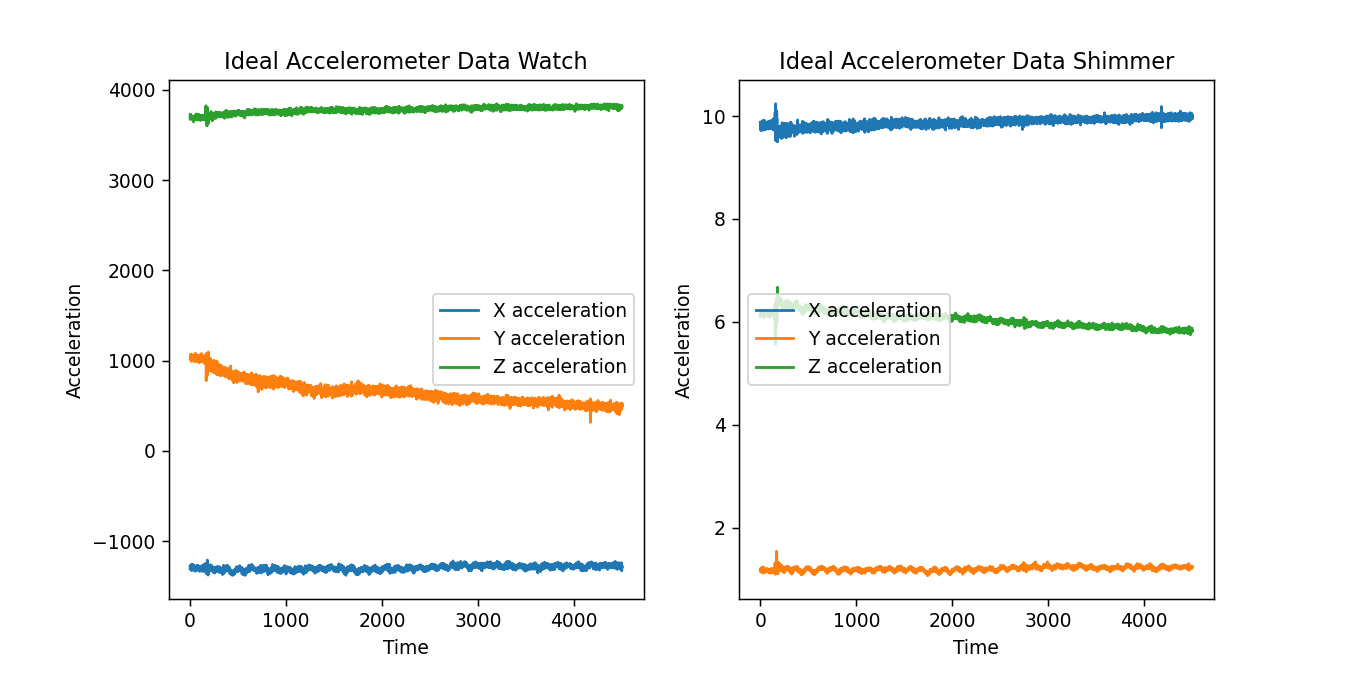

<IPython.core.display.Javascript object>


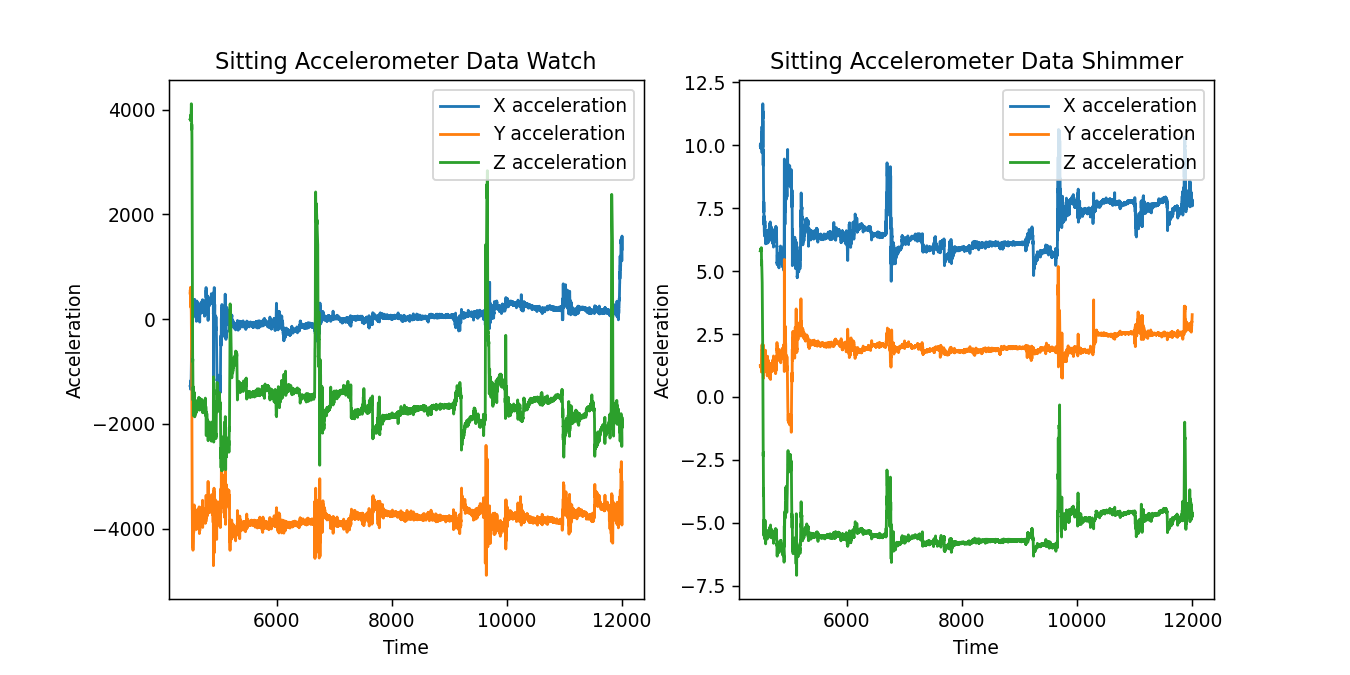

<IPython.core.display.Javascript object>


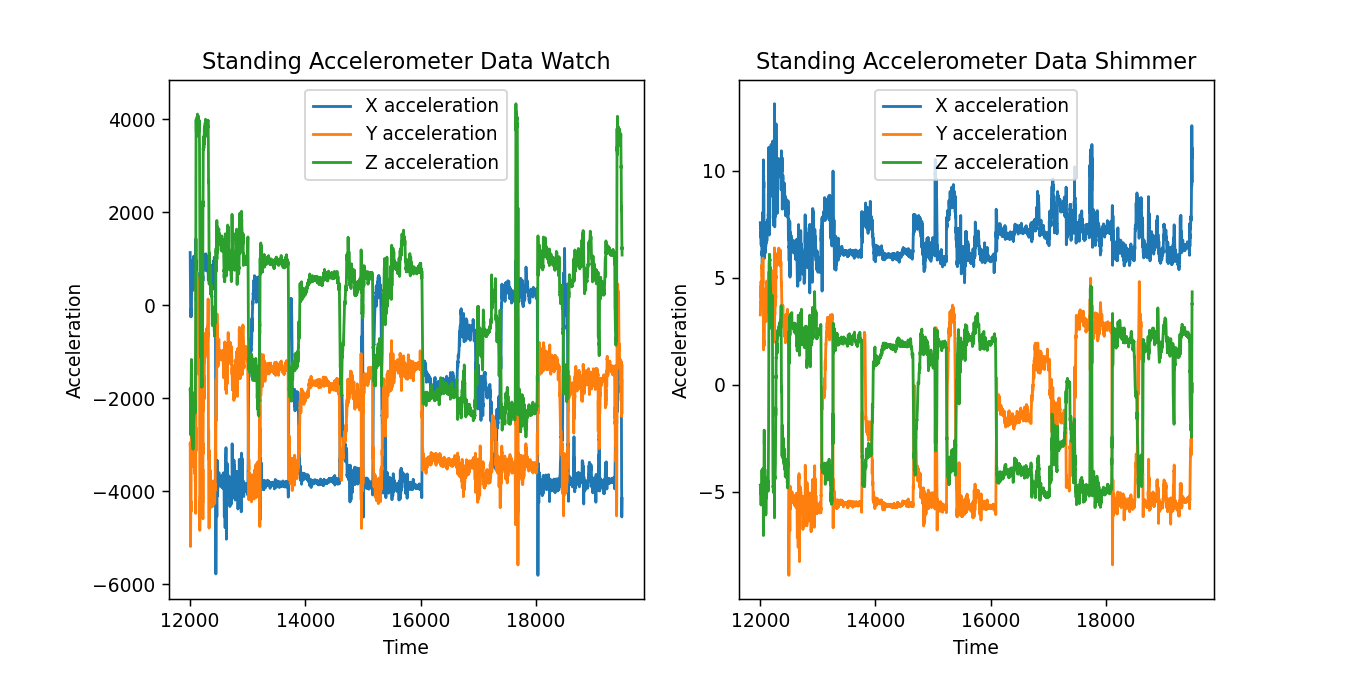

<IPython.core.display.Javascript object>


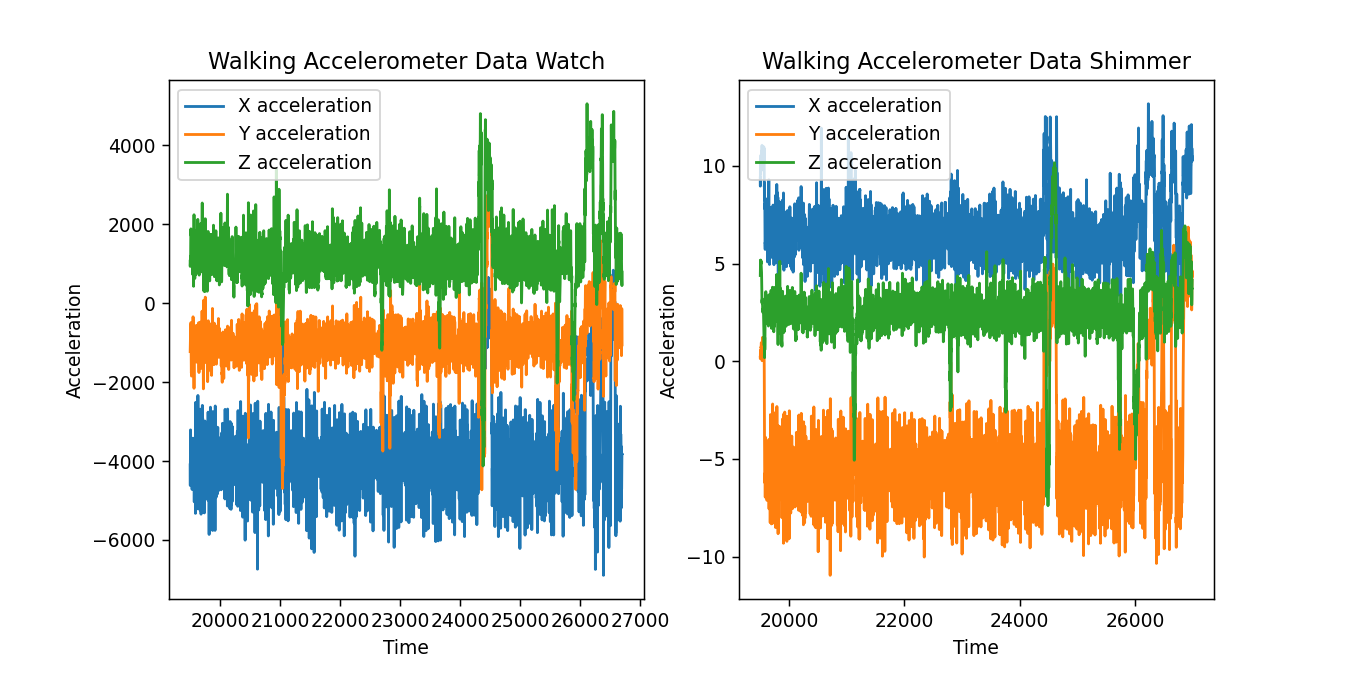

In [56]:
# Get a list of the unique activities in the data frame
activities = dfm['Activity'].unique()

# Loop through each activity and create a separate plot for each one
for activity in activities:
    # Filter the data by activity for the first dataframe
    activity_data1 = dfm[dfm['Activity'] == activity]

    # Filter the data by activity for the second dataframe
    activity_data2 = df[df['Activity'] == activity]

    # Create a figure and two axis objects side by side
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

    # Plot the x, y, and z acceleration for the first dataframe on the first axis
    ax1.plot(activity_data1['A_X'], label='X acceleration')
    ax1.plot(activity_data1['A_Y'], label='Y acceleration')
    ax1.plot(activity_data1['A_Z'], label='Z acceleration')
    ax1.set_title(activity + ' Accelerometer Data Watch')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Acceleration')
    ax1.legend()

    # Plot the x, y, and z acceleration for the second dataframe on the second axis
    ax2.plot(activity_data2['SA_X'], label='X acceleration')
    ax2.plot(activity_data2['SA_Y'], label='Y acceleration')
    ax2.plot(activity_data2['SA_Z'], label='Z acceleration')
    ax2.set_title(activity + ' Accelerometer Data Shimmer')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Acceleration')
    ax2.legend()

    # Show the plot
    plt.show()



In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfm[['A_X', 'A_Y', 'A_Z']] = scaler.fit_transform(dfm[['A_X', 'A_Y', 'A_Z']])
df[['SA_X', 'SA_Y', 'SA_Z']] = scaler.fit_transform(df[['SA_X', 'SA_Y', 'SA_Z']])

<IPython.core.display.Javascript object>


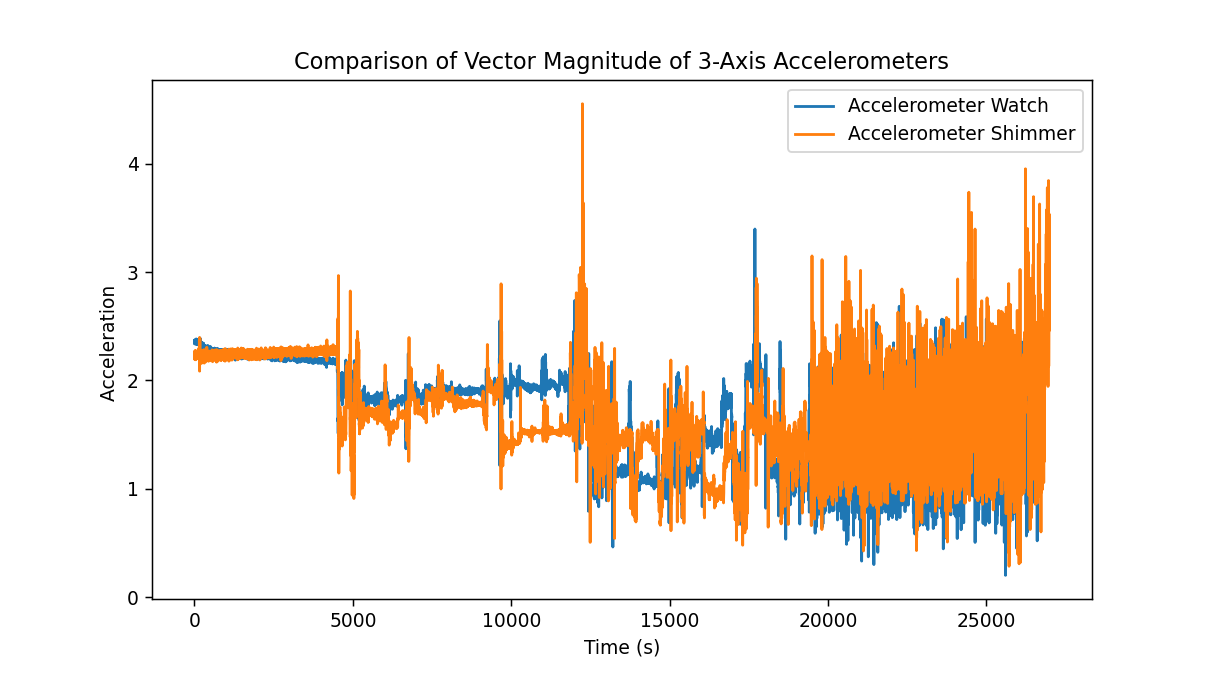

In [58]:
# Calculate vector magnitude
dfm['vm'] = np.sqrt(dfm['A_X']**2 + dfm['A_Y']**2 + dfm['A_Z']**2)
df['vm'] = np.sqrt(df['SA_X']**2 + df['SA_Y']**2 + df['SA_Z']**2)



# Create a single subplot and plot the vector magnitude for each accelerometer
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(dfm['vm'], label='Accelerometer Watch')
ax.plot(df['vm'], label='Accelerometer Shimmer')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Acceleration ')
ax.set_title('Comparison of Vector Magnitude of 3-Axis Accelerometers')
ax.legend()

plt.show()

In [59]:
merged_df = pd.concat([dfm[['Time','A_X','A_Y','A_Z','PPG']], df[['STime','SA_X','SA_Y','SA_Z','SPPG']]], axis=1)
merged_df

,Time,A_X,A_Y,A_Z,PPG,STime,SA_X,SA_Y,SA_Z,SPPG
0,2023-02-27 14:32:07.000,0.324443,1.721407,1.561281,2097152.0,2023-02-27 14:32:07.000,1.664778,0.665923,1.368876,1515.7509157509157
1,2023-02-27 14:32:07.025,0.345735,1.724973,1.587802,2146043.0,2023-02-27 14:32:07.025,1.657738,0.662955,1.368876,1443.956043956044
2,2023-02-27 14:32:07.050,0.323323,1.722001,1.561281,2146047.0,2023-02-27 14:32:07.050,1.566212,0.665923,1.396301,1370.6959706959706
3,2023-02-27 14:32:07.075,0.331727,1.723190,1.586329,2146060.0,2023-02-27 14:32:07.075,1.629576,0.668892,1.376355,1344.3223443223442
4,2023-02-27 14:32:07.100,0.334529,1.729728,1.567175,2146092.0,2023-02-27 14:32:07.100,1.622536,0.677797,1.381342,1347.2527472527472
...,...,...,...,...,...,...,...,...,...,...
26987,NaT,NaN,NaN,NaN,NaN,2023-02-27 14:50:06.075,2.122405,1.381325,0.812894,1400.0
26988,NaT,NaN,NaN,NaN,NaN,2023-02-27 14:50:06.100,2.052001,1.553496,0.827853,1386.8131868131868
26989,NaT,NaN,NaN,NaN,NaN,2023-02-27 14:50:06.125,1.932314,1.615834,0.820373,1383.150183150183
26990,NaT,NaN,NaN,NaN,NaN,2023-02-27 14:50:06.150,1.904152,1.574276,0.877717,1386.080586080586


In [60]:
merged_df=merged_df.drop(index=merged_df[merged_df['STime'] == merged_df['Time']].index)
merdf=merged_df.reset_index(drop=True)
merdf

,Time,A_X,A_Y,A_Z,PPG,STime,SA_X,SA_Y,SA_Z,SPPG
0,2023-02-27 14:32:08.000,0.330046,1.720218,1.570613,2116617.0,2023-02-27 14:32:07.325,1.622536,0.674829,1.383835,1347.985347985348
1,2023-02-27 14:32:08.025,0.341252,1.705952,1.575524,2116506.0,2023-02-27 14:32:07.350,1.559172,0.671860,1.386328,1438.8278388278388
2,2023-02-27 14:32:08.050,0.351898,1.736267,1.579944,2103718.0,2023-02-27 14:32:07.375,1.657738,0.671860,1.378848,1523.0769230769229
3,2023-02-27 14:32:08.075,0.335089,1.710707,1.568648,2103624.0,2023-02-27 14:32:07.400,1.622536,0.662955,1.388821,1482.7838827838827
4,2023-02-27 14:32:08.100,0.327805,1.724973,1.574051,2103710.0,2023-02-27 14:32:07.425,1.608455,0.665923,1.391314,1397.069597069597
...,...,...,...,...,...,...,...,...,...,...
26974,NaT,NaN,NaN,NaN,NaN,2023-02-27 14:50:06.075,2.122405,1.381325,0.812894,1400.0
26975,NaT,NaN,NaN,NaN,NaN,2023-02-27 14:50:06.100,2.052001,1.553496,0.827853,1386.8131868131868
26976,NaT,NaN,NaN,NaN,NaN,2023-02-27 14:50:06.125,1.932314,1.615834,0.820373,1383.150183150183
26977,NaT,NaN,NaN,NaN,NaN,2023-02-27 14:50:06.150,1.904152,1.574276,0.877717,1386.080586080586


<IPython.core.display.Javascript object>


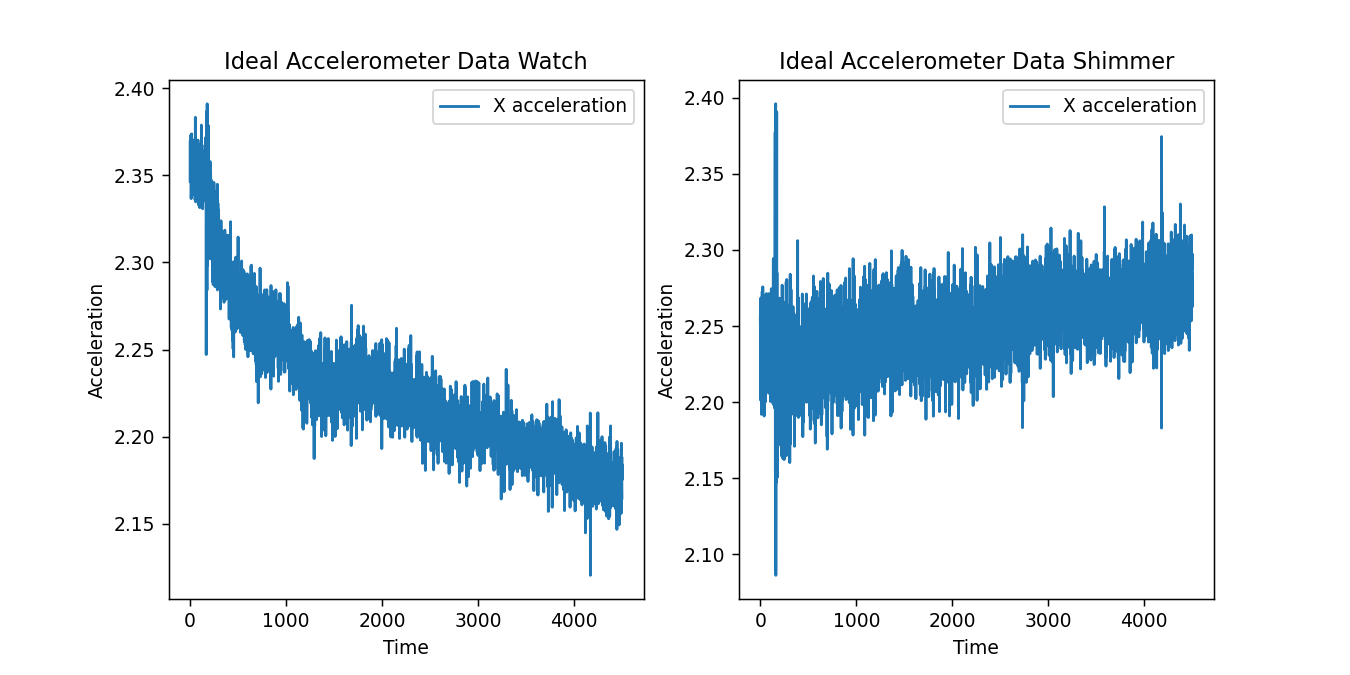

<IPython.core.display.Javascript object>


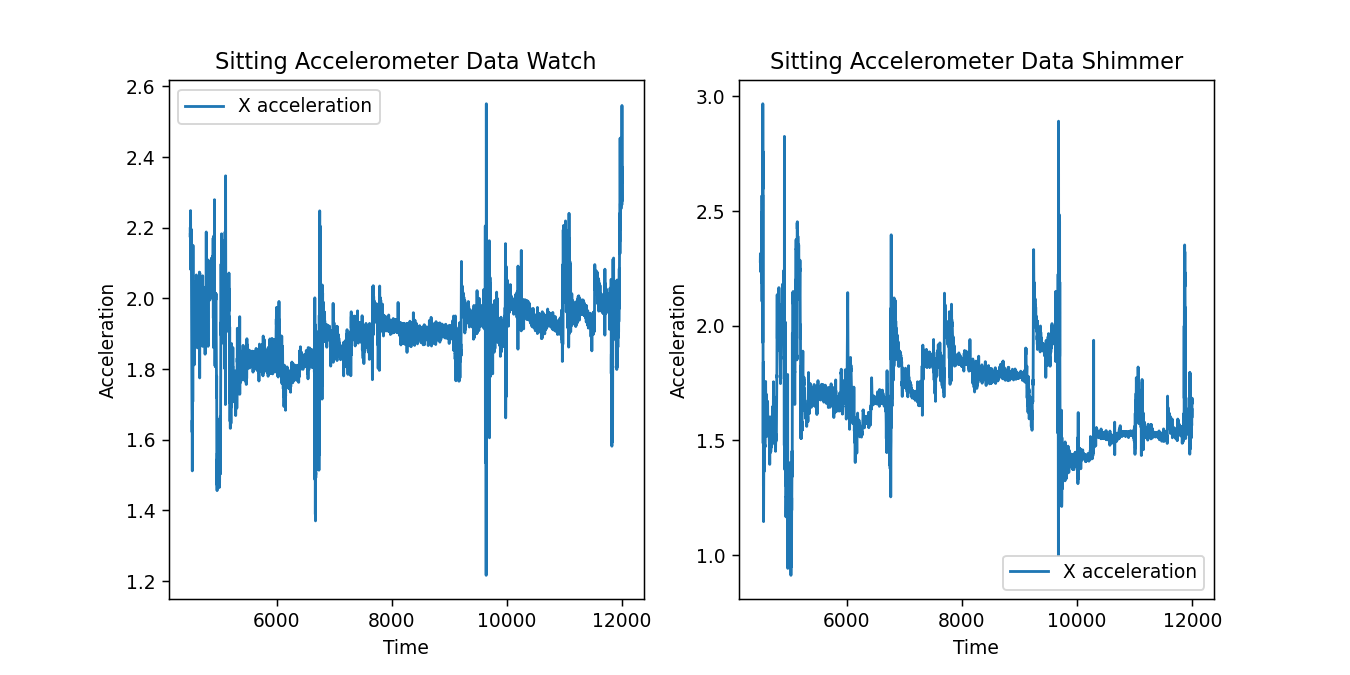

<IPython.core.display.Javascript object>


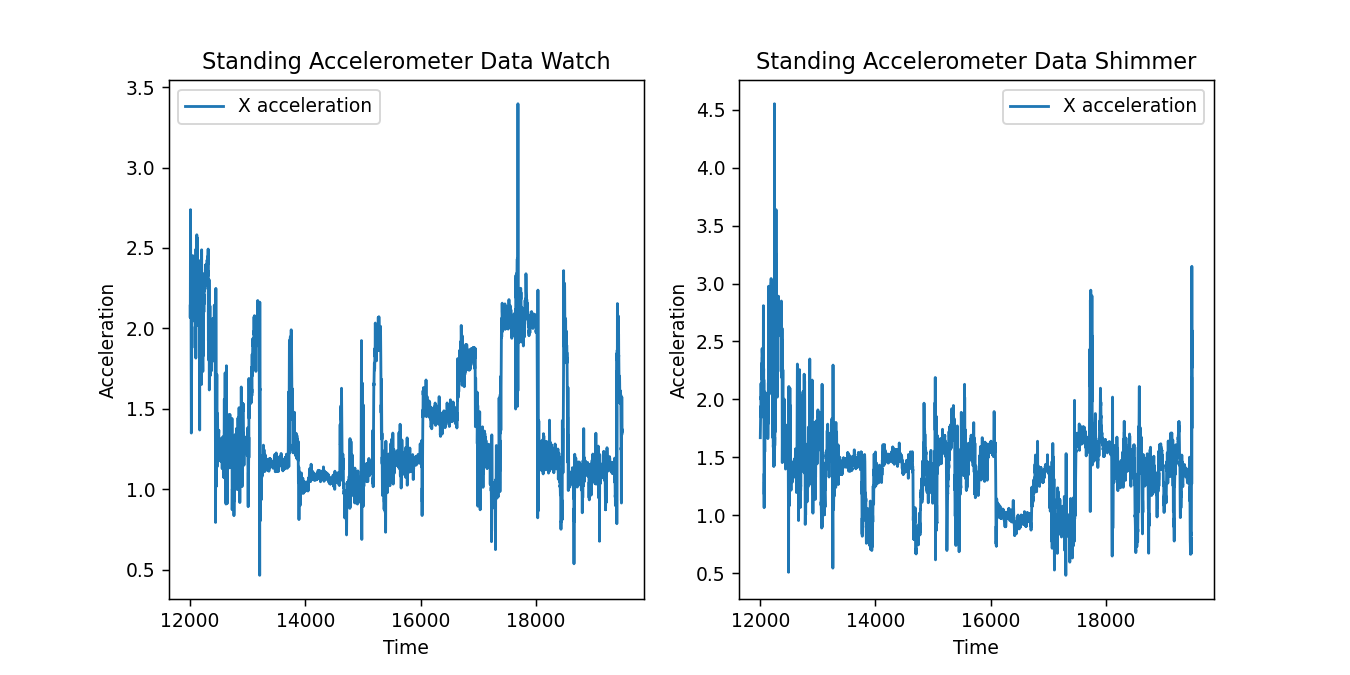

<IPython.core.display.Javascript object>


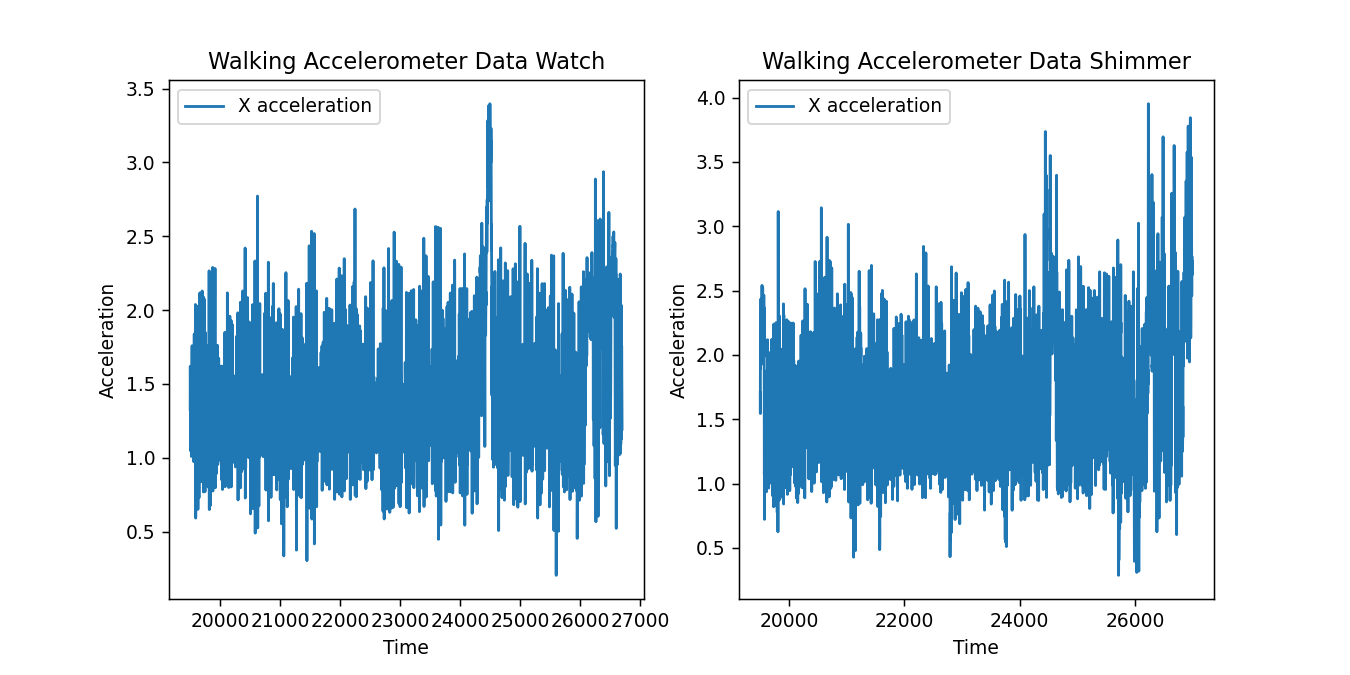

In [61]:
# Get a list of the unique activities in the data frame
activities = dfm['Activity'].unique()

# Loop through each activity and create a separate plot for each one
for activity in activities:
    # Filter the data by activity for the first dataframe
    activity_data1 = dfm[dfm['Activity'] == activity]

    # Filter the data by activity for the second dataframe
    activity_data2 = df[df['Activity'] == activity]

    # Create a figure and two axis objects side by side
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

    # Plot the x, y, and z acceleration for the first dataframe on the first axis
    ax1.plot(activity_data1['vm'], label='X acceleration')
 
    ax1.set_title(activity + ' Accelerometer Data Watch')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Acceleration')
    ax1.legend()

    # Plot the x, y, and z acceleration for the second dataframe on the second axis
    ax2.plot(activity_data2['vm'], label='X acceleration')
  
    ax2.set_title(activity + ' Accelerometer Data Shimmer')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Acceleration')
    ax2.legend()

    # Show the plot
    plt.show()
